# Table of Contents
 <p><div class="lev2 toc-item"><a href="#dev-Convolutional-neural-networks" data-toc-modified-id="dev-Convolutional-neural-networks-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>dev Convolutional neural networks</a></div>

In [1]:
# https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
# https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/?completed=/loading-custom-data-deep-learning-python-tensorflow-keras/

In [1]:
# in this we learn how to read in some outside data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob

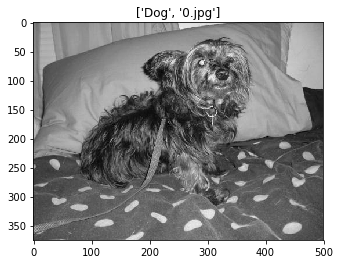

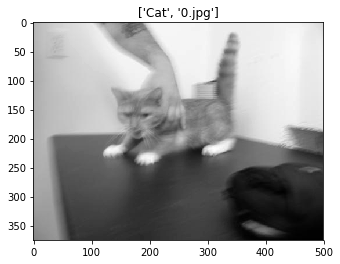

In [2]:
DATADIR = "/Users/sebastian/work/data/kagglecatsanddogs/PetImages/"
CATAGORIES = ["Dog", "Cat"]

for category in CATAGORIES:
    path = os.path.join(DATADIR, category)
    imgs = glob.glob(os.path.join(path, "*.jpg"))
    for img in imgs[:1]:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.figure()
        plt.imshow(img_array, cmap='gray')
        plt.title(img.split("/")[-2:])
        plt.show()
        
#         break
#     break

In [3]:
print(img_array)

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


In [4]:
img_array.shape

(375, 500)

In [5]:
# this is 375 tall and 500 wide 

In [6]:
# all the images have different sizes so we need to resize them to the
# same size

In [7]:
IMG_SIZE = 50
# IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

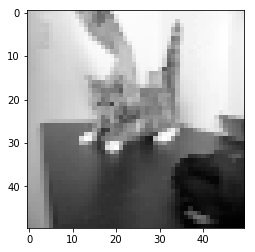

In [8]:
plt.figure()
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:


def create_training_data():
    
    data = []
    
    for category in CATAGORIES:
        path = os.path.join(DATADIR, category)
        imgs = glob.glob(os.path.join(path, "*.jpg"))
        class_num = CATAGORIES.index(category) # either cat or dog as numerical value
        for img in imgs:
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                pass
            
    return data


In [10]:
training_data = create_training_data()

In [11]:
len(training_data)

599

In [12]:
for sample in training_data:
    print(sample[1], end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [13]:
#lets shuffle the data

In [14]:
import random

In [15]:
random.shuffle(training_data)

In [16]:
for sample in training_data:
    print(sample[1], end=" ")

0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 

In [17]:
# lets organise into training data lists
# X = features
# y = labels

In [96]:
X=[]
y=[]

for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
# now need to convert into numpy array and
# reshape


X = np.array(X)

# NEED to do the -1 at the beginning!
# otherwise the network doesn't work :(
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1) #last 1 is because one value i.e. grey scale

In [97]:
# example how to save.
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

# X = pickle.load(open("X.pickle", "rb"))
# y = pickle.load(open("y.pickle", "rb"))


## dev Convolutional neural networks

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [99]:
from tensorflow.keras.utils import normalize

In [100]:
# X = normalize(X, axis=1)

In [101]:
# grey scale so max value is 255.
X = X/255.0

In [123]:
# build network
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [124]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_27 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_28 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 7744)              0         
__________

In [126]:
model.fit(X, y, epochs=3, batch_size=32, validation_split=0.3)

Train on 419 samples, validate on 180 samples
Epoch 1/3
419/419 [==============================] - 2s 5ms/step - loss: 0.7459 - acc: 0.4964 - val_loss: 0.6930 - val_acc: 0.5111
Epoch 2/3
419/419 [==============================] - 1s 3ms/step - loss: 0.6923 - acc: 0.5489 - val_loss: 0.6932 - val_acc: 0.4889
Epoch 3/3
419/419 [==============================] - 1s 3ms/step - loss: 0.6885 - acc: 0.5585 - val_loss: 0.6875 - val_acc: 0.5611
